# Assignment 3

The assignment 3 contains 2 questions and the due date is April 24th (Sunday) 23:59PM.

## STUDENT NAME: ISABEL MORA LABARCA (48516)

## Question 1 Image Compression

In this question, you will work with images and apply KMeans for image compression, by reducing the number of colours that occur in an image to only those that are most common in that image.


### Question 1.1 (0 points)

To let you learn how Python work with images, plese complete this question.

### Black & white images

Each images represent a matrix where each pixel is an element of this matrix 
<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png">
The scale of colors is between 0 and 255 : 0 correspond to black and 255 to white

### Colored images
<img src="https://miro.medium.com/max/840/1*y0nV4cWk3KbzXSe9dIWL5g.jpeg">

Every color is a linear combinaison of primary colors : Red Green Blue <br/>
A colored image is somehow just the supperposition of three images : for each pixel with have three values




### Download images

We are using the famous [The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) that consists of 60000 32x32 color images in 10 classes, with 6000 images per class. We need to donwload this dataset from tensorflow. If you have not installed tensorflow, please follow the [instllation guide](https://www.tensorflow.org/install) to get it or simply use Google colab for this assignment.




In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

By checking the shape, you will find the train set contains 50,000 images with the shape of (32, 32, 3) that indicates the image resolution with 3 color channels.

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
len(x_train[3000][10][10]) #each picture has 32, which has 32, which has 3

3

You can visually check a random image:

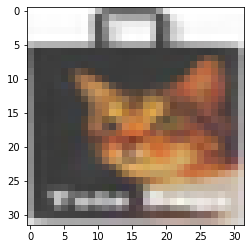

In [5]:
plt.imshow(x_train[3000])

We can also check the image at each of three channels:

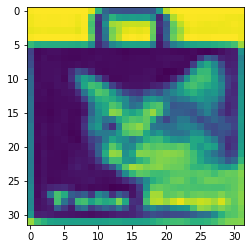

In [6]:
plt.imshow(x_train[3000][:, :, 0])

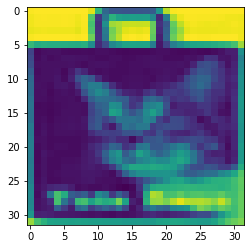

In [7]:
plt.imshow(x_train[3000][:, :, 1])

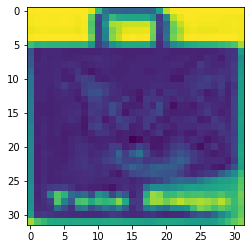

In [8]:
plt.imshow(x_train[3000][:, :, 2])

We can convert a color image as a greyscale image using the NTSC formula: 0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue. This formula closely represents the average person's relative perception of the brightness of red, green, and blue light.

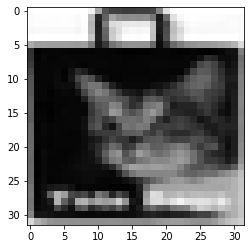

In [9]:
R, G, B = x_train[3000][:,:,0], x_train[3000][:,:,1], x_train[3000][:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')

### Question 1.2 (15 points)

Convert all color images in x_train into greyscale images and use the sklearn.decomposition.PCA to perform principal component analysis to the dataset to reduce dimensions to 256. Then, reconstruct images from its reduced representation. Choose a image and see how it goes before and after the PCA using imread method. Explain your findings.  

**Hint** You may need to use numpy's reshape method to change the representation of each image as a vector before performing PCA and reshape it back as an image before you are able to visualize it.

In [10]:
x_train.shape

(50000, 32, 32, 3)

## Convert all color images in x_train into greyscale images

In [11]:
x_train_grey_scale = 0.2989 * x_train[:,:,:,0] + 0.5870 * x_train[:,:,:,1] + 0.1140 * x_train[:,:,:,2]

In [12]:
x_train_grey_scale.shape

(50000, 32, 32)

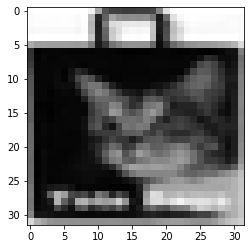

In [13]:
plt.imshow(x_train_grey_scale[3000], cmap='gray')

## Use the sklearn.decomposition.PCA to perform principal component analysis to the dataset to reduce dimensions to 256

### 1. Reshape data before PCA

In [14]:
# Check min and max values for training dataset to determine if we should normalize before applying PCA

np.min(x_train_grey_scale),np.max(x_train_grey_scale)

(0.0, 254.97449999999998)

In [15]:
x_train_reshaped = x_train_grey_scale.reshape(x_train_grey_scale.shape[0],-1)

In [16]:
x_train_reshaped.shape

(50000, 1024)

In [17]:
# Same as x_train_reshaped
x_train_flat = x_train_grey_scale.reshape(-1,1024)

In [18]:
x_train_flat.shape

(50000, 1024)

In [19]:
# Check that arrays are equal
np.array_equal(x_train_reshaped, x_train_flat)

True

### 2. Perform PCA

In [20]:
# PCA with whiten = True
from sklearn.decomposition import PCA
pca_cifar_whiten = PCA(n_components = 256, whiten=True, random_state = 42)
x_train_pca_whiten = pca_cifar_whiten.fit_transform(x_train_reshaped)

In [21]:
# PCA with whiten = False
from sklearn.decomposition import PCA
pca_cifar = PCA(n_components = 256, random_state = 42)
x_train_pca = pca_cifar.fit_transform(x_train_reshaped)

In [22]:
# PCA with standardization + whiten

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_reshaped)
pca_cifar_scaled_whiten = PCA(n_components = 256, random_state = 42, whiten = True)
x_train_pca_scaled_whiten = pca_cifar_scaled_whiten.fit_transform(x_train_scaled)

In [23]:
# PCA with standardization, whiten = False

pca_cifar_scaled = PCA(n_components = 256, random_state = 42)
x_train_pca_scaled = pca_cifar_scaled.fit_transform(x_train_scaled)

## Then, reconstruct images from its reduced representation. Choose a image and see how it goes before and after the PCA using imread method. Explain your findings.

### 1. Make sure all our shapes are correct (50000, 256)

In [24]:
# PCA with whiten = True
x_train_pca_whiten.shape

(50000, 256)

In [25]:
# PCA with whiten = False
x_train_pca.shape

(50000, 256)

In [26]:
# PCA with normalization + whiten
x_train_pca_scaled_whiten.shape

(50000, 256)

In [27]:
# PCA with normalization, whiten = False
x_train_pca_scaled.shape

(50000, 256)

### 2. Turn back to original shape

Text(0.5, 1.0, 'Original Picture')

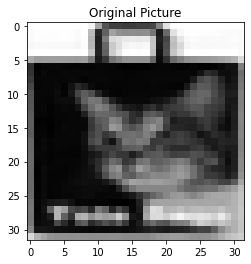

In [28]:
# Picture before PCA (original)
plt.imshow(x_train_grey_scale[3000], cmap='gray')
plt.title("Original Picture")

#### 1. PCA with whiten = True

Text(0.5, 1.0, 'PCA, whiten = True')

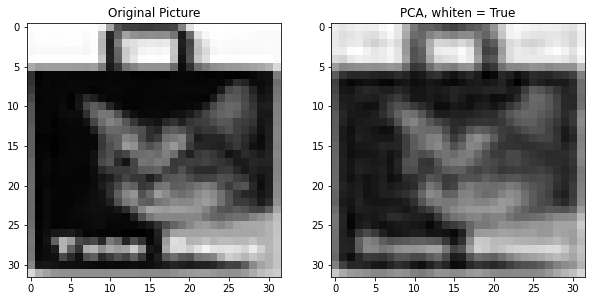

In [29]:
# Plot pictures side by side

plt.figure(figsize=[10,10])

# Display original image in training data
plt.subplot(121)
plt.imshow(x_train_grey_scale[3000], cmap='gray')
plt.title("Original Picture")

# Display the transformed image
plt.subplot(122)
# PCA with whiten = True
x_train_pca_whiten_recovered = pca_cifar_whiten.inverse_transform(x_train_pca_whiten)
x_train_pca_whiten_recovered = x_train_pca_whiten_recovered.reshape(50000, 32, 32)
# Picture after PCA
plt.imshow(x_train_pca_whiten_recovered[3000], cmap='gray')
plt.title("PCA, whiten = True")

#### 2. PCA with default values

Text(0.5, 1.0, 'PCA, default')

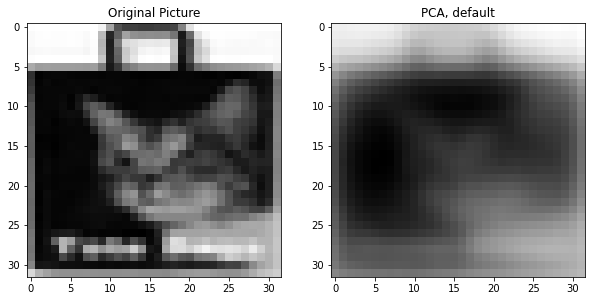

In [30]:
# Plot pictures side by side

plt.figure(figsize=[10,10])

# Display original image in training data
plt.subplot(121)
plt.imshow(x_train_grey_scale[3000], cmap='gray')
plt.title("Original Picture")

# Display the transformed image
plt.subplot(122)

# PCA with whiten = False
x_train_pca_transf = pca_cifar_whiten.inverse_transform(x_train_pca)
x_train_pca_transf = x_train_pca_transf.reshape(50000, 32, 32)

# Picture after PCA
plt.imshow(x_train_pca_transf[3000], cmap='gray')
plt.title("PCA, default")

#### 3. PCA with whiten = True and standardization

Text(0.5, 1.0, 'PCA, whiten = True, Data Standardized')

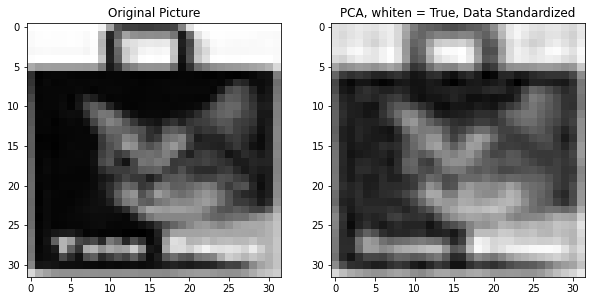

In [31]:
# Plot pictures side by side

plt.figure(figsize=[10,10])

# Display original image in training data
plt.subplot(121)
plt.imshow(x_train_grey_scale[3000], cmap='gray')
plt.title("Original Picture")

# Display the transformed image
plt.subplot(122)

# PCA with whiten = True and data standardized
x_train_pca_scaled_whiten_recovered = pca_cifar_scaled_whiten.inverse_transform(x_train_pca_scaled_whiten)
x_train_pca_scaled_whiten_recovered = x_train_pca_scaled_whiten_recovered.reshape(50000, 32, 32)

# Picture after PCA
plt.imshow(x_train_pca_scaled_whiten_recovered[3000], cmap='gray')
plt.title("PCA, whiten = True, Data Standardized")

#### 4. PCA, whiten = False, Data Standardized

Text(0.5, 1.0, 'PCA default, Data Standardized')

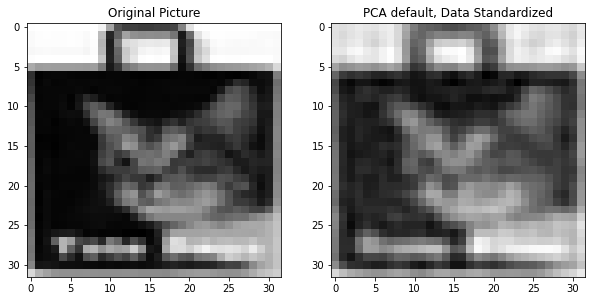

In [32]:
# Plot pictures side by side

plt.figure(figsize=[10,10])

# Display original image in training data
plt.subplot(121)
plt.imshow(x_train_grey_scale[3000], cmap='gray')
plt.title("Original Picture")

# Display the transformed image
plt.subplot(122)


# PCA default, Data Standardized
x_train_pca_scaled_recovered = pca_cifar_scaled.inverse_transform(x_train_pca_scaled)
x_train_pca_scaled_recovered = x_train_pca_scaled_recovered.reshape(50000, 32, 32)

# Picture after PCA
plt.imshow(x_train_pca_scaled_recovered[3000], cmap='gray')
plt.title("PCA default, Data Standardized")

#### Pictures 1, 3 and 4 look very similar. Let's check the data is not equal.

In [33]:
# Check that the arrays are not equal
# 3rd and 4th
np.array_equal(x_train_pca_scaled_whiten_recovered, x_train_pca_scaled_recovered)

False

In [34]:
# Check that the arrays are not equal
#3rd and 1st 
np.array_equal(x_train_pca_scaled_whiten_recovered, x_train_pca_whiten_recovered)

False

#### 1. To use the imread method specifically, we need to save the image first (according to documentation)

In [35]:
from skimage.io import imread, imsave

# reshape for display, choosing the one with standardized data only
pca_scaled_image_cat = x_train_pca_scaled_recovered[3000].reshape(32, 32)
original_cat = x_train_reshaped[3000].reshape(32, 32)
imsave("original_image.jpg", original_cat)
imsave('pca_standardized.jpg', pca_scaled_image_cat)

pca_array = imread('pca_standardized.jpg')
original_array = imread("original_image.jpg")

Lossy conversion from float64 to uint8. Range [54.7864, 254.97449999999998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-1.4992652029028513, 2.1107604854032354]. Convert image to uint8 prior to saving to suppress this warning.


In [36]:
len(np.unique(pca_array))

236

In [37]:
len(np.unique(original_array))

231

In [38]:
pca_array[0]

array([229, 220, 224, 231, 226, 227, 234, 235, 214, 177, 125, 100, 101,
        92,  76,  72,  82,  95,  96, 104, 143, 190, 225, 248, 249, 219,
       226, 234, 228, 221, 217, 232], dtype=uint8)

In [39]:
original_array[0]

array([255, 250, 253, 255, 255, 253, 255, 255, 243, 255, 158,  90,  74,
        55,  68,  50,  64,  60,  77, 122, 218, 255, 245, 255, 255, 253,
       252, 255, 255, 251, 255, 255], dtype=uint8)

### Answer

### *Code explained*

- To perform PCA on the 50000, 32, 32 array, we needed to reshape it to 50000, 1024 for it to not be 3-dimensional. 
- Thus, we reduced 1024 features to 256, and used the inverse_transform method to retrieve the PCA transformed image
- It is important to emphasize that in this case, a 32 X 32 image has 1024 picture elements (pixels) that are the dimensions or features which together represent that image.
- Before performing PCA, there are some hyperparameters and data processing that can be tested. For example, PCA's "whiten" argument, as defined by sklearn, "When True...the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances. Whitening will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.". It seems that it might be a good hyperparameter to use if we want better results in this case. 
- Moreover, PCA performs best when data is scaled, at least most of the times. This is because if some variables have a large variance and some small, PCA (maximizing variance) will load on the large variances. In this case, this could affect if our feature 1 has a range from 0 - 255, and feature 22 only stays at 255 (feature being one of the 1024 pixels). Thus, I decided to test both approaches, using the standard scaler and standardizing the data, as well as the default.
- When comparing the arrays, it is curious that in terms of unique values, the original array has less unique values (in a range from 0-255 based on R,G,B) than the PCA array. However, it is important to remember that this does not mean the original has more features than the PCA, but rather that becuase of the reduction of dimensions, the PCA cannot "grasp" all the colors perfectly, so it gives more or less something similar. 
- To illustrate the point above, if we look at the last picture comparison, we see that the original cat picture, the background seems pretty much all black. However, in the PCA picture, we see more colors as we see a more "pixeled" background. This is because when we reduced from 1024 to 256, some information was lost, and the PCA does it best to calculate an estimate of what information could that look like, per pixel, because PCA treis to preserve the essential parts that have more variation of the data, and remove the non-essential parts with fewer variation. (more on findings)


### *Findings*
-  A very important finding in this exercise is that we were able to reduce from 1024 to 256 features without loosing that much information (we can still see that the cat is a cat). This implies that, for machine learning algorithms implementations, we can reduce our data to more or less 25% of the original data and still achieve good results. In other words, we can speed up the training time of our model significantly without loosing a lot.
- Moreover, we might even see that our model does not only trains faster, but it might achieve better accuracy on the testing data than when comapred with the original training data with no PCA because of overfitting.
- There were not that many differences between whitening when not standardizing, or standardizing when not whitening. However, the default (not whitening and not standardizing) performs significantly worse.
- The point of performing PCA is to retrieve uncorrelated features between each other, that each represent a variation of the picture (they contain another set of features to which they are possibly correlated). So we end up with groups of similar correlation within them, but very different between each other.

In [40]:
print('Explained variation per principal component: {}'.format(pca_cifar_scaled.explained_variance_ratio_))

Explained variation per principal component: [2.84233578e-01 1.24724865e-01 7.88693115e-02 4.32532710e-02
 3.30477465e-02 3.09832027e-02 2.38821766e-02 2.33557235e-02
 1.67252233e-02 1.45330868e-02 1.26292870e-02 1.23810287e-02
 1.16597860e-02 1.05265222e-02 9.16619507e-03 8.23413542e-03
 7.37292893e-03 6.80195624e-03 6.66995817e-03 5.83526495e-03
 5.69621964e-03 5.47143353e-03 5.20032808e-03 5.12406655e-03
 4.67369092e-03 4.50046815e-03 4.22865769e-03 3.86359858e-03
 3.72019881e-03 3.55563822e-03 3.49948331e-03 3.30009047e-03
 3.06806497e-03 3.04235858e-03 2.96371835e-03 2.89596391e-03
 2.83466311e-03 2.62118040e-03 2.61829700e-03 2.53151999e-03
 2.42039773e-03 2.37647451e-03 2.23142752e-03 2.19062254e-03
 2.12582506e-03 2.07871121e-03 2.01377307e-03 1.93588342e-03
 1.85459954e-03 1.83205632e-03 1.82146058e-03 1.78831115e-03
 1.77398977e-03 1.73820613e-03 1.66879643e-03 1.63133048e-03
 1.56595260e-03 1.55006516e-03 1.53416165e-03 1.49718551e-03
 1.41872982e-03 1.40388587e-03 1.3860372

In [41]:
print('Total explained variation ratio with 256 components: {}'.format((pca_cifar_scaled.explained_variance_ratio_).sum()))

Total explained variation ratio with 256 components: 0.9723019637674172


From the above output, you can observe that the principal component 1 holds 28.4% of the information while the principal component 2 holds only 12.5% of the information. Also, the other point to note is that we only lost around 3% of information when projecting from 1024 to 256.

References:
- https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
- https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca

### Question 1.3 (15 points)

Now explain which number of principal components should be chosen using Elbow method if PCA reaches 90% threshold of explained variance. Use the obtained number of principal components to reduce the image dimensions and again compare the reconstructed images from the previous step. Expalin your findings.

#### *Answer: First, we need to decide which PCA option is best (default, whiten = True, standardizing data, or the last two combined.)*

It seems that all options are better than the default (so whiten is better than not, and standardizing is better than not), so I will do both as suggested by Dr. Han on Teams. However, for this case, there doesn't seem to be a significant difference between whiten or not whiten when data is standardized. Yet, there might be different number of principal components depending on which hyperparameter / data processing method is applied. We will test this hypothesis for non-standardized data passing the whiten parameter = True. Thus, we will compare both cases of whiten = True, one with standardized data and one without. 

#### Now explain which number of principal components should be chosen using Elbow method if PCA reaches 90% threshold of explained variance

In [42]:
# We could manually check first
print("PCA with data standardized and whiten = True: ")
np.sum((pca_cifar_scaled_whiten.explained_variance_ratio_).round(3)[:78])

PCA with data standardized and whiten = True: 


0.9000000000000001

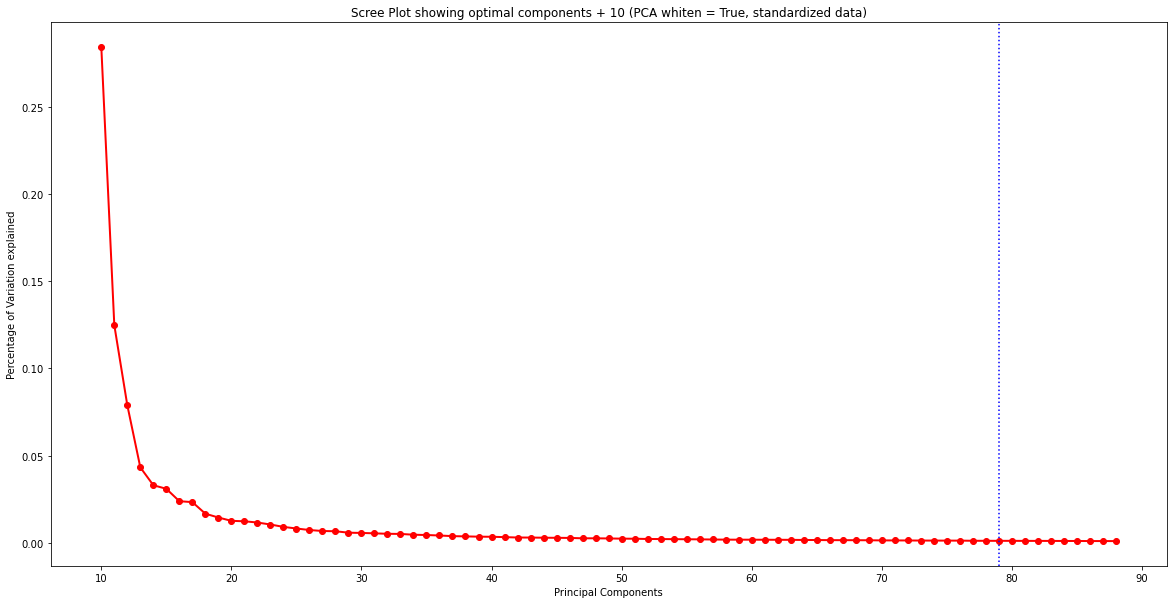

The number of principal components that should be chosen using if PCA reaches 90% threshold of explained variance is 79


In [43]:
#This plot is the scree plot - shows the variance explained by the PCs.
import numpy as np
from sklearn.decomposition import PCA
pca_optimal_90 = PCA(0.9, whiten = True, random_state = 42)
x_train_pca_optimal_90 = pca_optimal_90.fit_transform(x_train_scaled)

#now based on the scree plot we see how many principal components are actually needed to achieve desired % of variance explained
percent_var = np.round(pca_optimal_90.explained_variance_ratio_*100, decimals=1)   #calculating the percentage of variation that each principal component accounts for
labels = ['PC'+str(p) for p in range(1,len(percent_var)+1)]

#plotting the graph to see contribution of each principal component
f, ax = plt.subplots(figsize=(20,10))

PC_values = np.arange(pca_optimal_90.n_components_) + 10
plt.plot(PC_values, pca_optimal_90.explained_variance_ratio_, 'ro-', linewidth=2)
plt.axvline(x = pca_optimal_90.n_components_, color = 'b', linestyle = ':', label = "blue line")
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variation explained')
plt.title('Scree Plot showing optimal components + 10 (PCA whiten = True, standardized data)')
plt.show()

n_components_90_variance = pca_optimal_90.n_components_
print(f"The number of principal components that should be chosen using if PCA reaches 90% threshold of explained variance is {n_components_90_variance}")

#### We can check number of principal components when data is not standardized

In [44]:
pca_optimal_90_non = PCA(0.9, whiten = True, random_state = 42)
x_train_pca_optimal_90_non = pca_optimal_90_non.fit_transform(x_train_reshaped) #x_train_reshaped is not standardized
n_components_90_variance_non = pca_optimal_90_non.n_components_
print(f"The number of principal components that should be chosen using if PCA reaches 90% threshold of explained variance if not \n standardizing the data is {n_components_90_variance_non}")

The number of principal components that should be chosen using if PCA reaches 90% threshold of explained variance if not 
 standardizing the data is 76


#### We can plot the Elbow method, which is basically the opposite of the scree plot shown above.

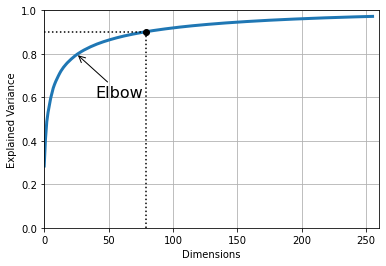

Number of principal components that should be chosen to preserve 90% of explained variation: 79


In [45]:
cumsum = np.cumsum(pca_cifar_scaled_whiten.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 260, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.90], "k:")
plt.plot([0, d], [0.90, 0.90], "k:")
plt.plot(d, 0.90, "ko")
plt.annotate("Elbow", xy=(25, 0.8), xytext=(40, 0.6),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()
print(f"Number of principal components that should be chosen to preserve 90% of explained variation: {d}")

#### Use the obtained number of principal components to reduce the image dimensions and again compare the reconstructed images from the previous step.

Text(0.5, 1.0, 'PCA, n_components = 79, 90 % explained var.')

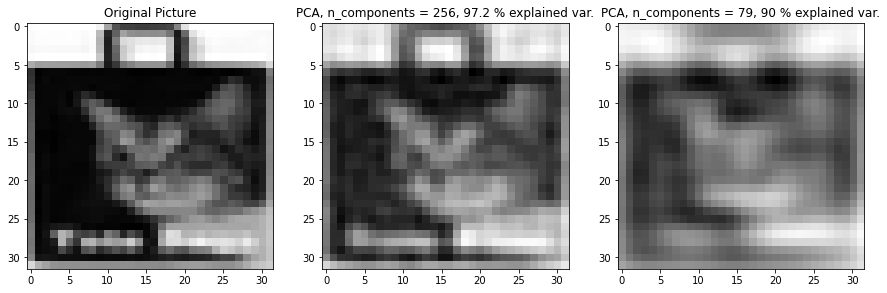

In [46]:
# Plot pictures side by side

plt.figure(figsize=[15,15])

# Display original image in training data
plt.subplot(131)
plt.imshow(x_train_grey_scale[3000], cmap='gray')
plt.title("Original Picture")

# Display the transformed image
plt.subplot(132)

# Picture after PCA with n = 256
exp_variation_256 = (np.sum(pca_cifar_scaled_whiten.explained_variance_ratio_).round(3))*100
plt.imshow(x_train_pca_scaled_whiten_recovered[3000], cmap='gray')
plt.title(f"PCA, n_components = 256, {exp_variation_256} % explained var.")


# Turn back to original shape the array with components to keep 90% variance
x_train_pca_optimal_90_recovered = pca_optimal_90.inverse_transform(x_train_pca_optimal_90)
x_train_pca_optimal_90_recovered = x_train_pca_optimal_90_recovered.reshape(50000, 32, 32)

# Picture after PCA with n = 79 (optimal for 90% of explained variance)
plt.subplot(133)
plt.imshow(x_train_pca_optimal_90_recovered[3000], cmap='gray')
plt.title(f"PCA, n_components = {d}, 90 % explained var.")

Text(0.5, 1.0, 'PCA, n_components = 76, 90 % explained var.')

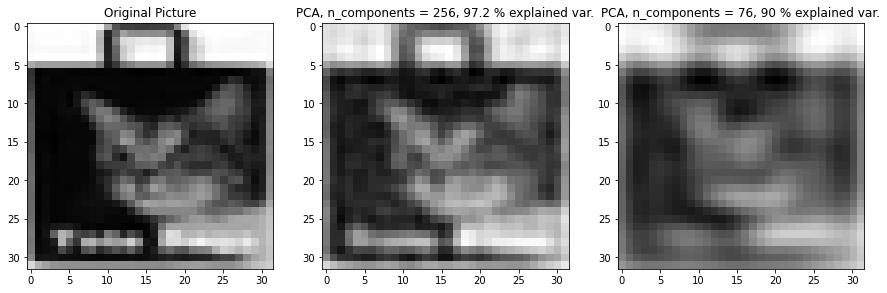

In [47]:
# Same as above, but with the data not standardized
# Plot pictures side by side

plt.figure(figsize=[15,15])

# Display original image in training data
plt.subplot(131)
plt.imshow(x_train_grey_scale[3000], cmap='gray')
plt.title("Original Picture")

# Display the transformed image
plt.subplot(132)
# Picture after PCA with n = 256
exp_variation_256 = (np.sum(pca_cifar_scaled_whiten.explained_variance_ratio_).round(3))*100
plt.imshow(x_train_pca_scaled_whiten_recovered[3000], cmap='gray')
plt.title(f"PCA, n_components = 256, {exp_variation_256} % explained var.")


# Turn back to original shape the array with components to keep 90% variance
x_train_pca_optimal_90_recovered_2 = pca_optimal_90_non.inverse_transform(x_train_pca_optimal_90_non)
x_train_pca_optimal_90_recovered_2 = x_train_pca_optimal_90_recovered_2.reshape(50000, 32, 32)

# Picture after PCA with n = 76 (optimal for 90% of explained variance)
d2 = n_components_90_variance_non
plt.subplot(133)
plt.imshow(x_train_pca_optimal_90_recovered_2[3000], cmap='gray')
plt.title(f"PCA, n_components = {d2}, 90 % explained var.")

### Findings:

- Using the PCA whiten with data standardized, we found that an optimal number of components was 79. When data is not standardized (but the whiten argument is still passed), the optimal number of components is 76. There is not a big difference between 79 and 76, but if the difference was significant we should select the one with the least number of components to work with (this will give us the benefits that we are looking for)
- With help of the scree plot (that shows the cumulative explained variation per component) and the elbow method, we can decide what is the optimal number of components by looking at when the line stops changing (when adding another component does not help that much)
- However, PCA allows us to train it in a way that instead of passing the number of components, we pass a decimal between 0 and 1 that represents the variation that we want to get from the original dimensions. Thus, PCA calculates the minimum number of components that achieve this threshold selected
- From the pictures, we can see that it is harder to detect that the cat is a cat with the 90% explained variation. However, the "shape" of the cat it is still visible (we see a shadow somewhat) but it is not that clear. Depending on how differents our target variable images are, this might or might not be what we want (it is different to try to detect a triangle vs a circle, than trying to detect a dog vs a cat)

### Question 1.4 (15 points)

Now build an image classifier of Logistic Regression (with default configuration) to predict the class of images using the original greyscale images and the compressed representations from PCA that explains 90% of variance. Use the 5-fold cross-validation to report the average macro-f1 test score (given this is a balanced dataset) and total fit time. Explain your findings.

Hint: y_train contains the uint8 value and cross-validate would not consider it as the label for classification. You need to convert the y_train into categorical values such that cross-validate would perform multi-class classification.

#### Convert y_train into categorical values

In [48]:
y_train.shape

(50000, 1)

In [49]:
y_train_reshaped = y_train.reshape(50000,)

In [50]:
y_train_reshaped.shape

(50000,)

In [51]:
# convert y train to categorical

label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

y_train_cat = [label_dict[letter] for letter in y_train_reshaped]
y_train_cat

['frog',
 'truck',
 'truck',
 'deer',
 'automobile',
 'automobile',
 'bird',
 'horse',
 'ship',
 'cat',
 'deer',
 'horse',
 'horse',
 'bird',
 'truck',
 'truck',
 'truck',
 'cat',
 'bird',
 'frog',
 'deer',
 'cat',
 'frog',
 'frog',
 'bird',
 'frog',
 'cat',
 'dog',
 'deer',
 'airplane',
 'airplane',
 'truck',
 'automobile',
 'cat',
 'deer',
 'airplane',
 'cat',
 'horse',
 'cat',
 'cat',
 'dog',
 'bird',
 'bird',
 'horse',
 'automobile',
 'automobile',
 'automobile',
 'bird',
 'bird',
 'airplane',
 'truck',
 'dog',
 'horse',
 'truck',
 'bird',
 'bird',
 'dog',
 'bird',
 'deer',
 'cat',
 'automobile',
 'automobile',
 'ship',
 'bird',
 'automobile',
 'automobile',
 'deer',
 'truck',
 'horse',
 'ship',
 'dog',
 'truck',
 'frog',
 'horse',
 'cat',
 'automobile',
 'truck',
 'airplane',
 'cat',
 'automobile',
 'cat',
 'dog',
 'deer',
 'dog',
 'horse',
 'horse',
 'deer',
 'horse',
 'truck',
 'deer',
 'bird',
 'cat',
 'ship',
 'airplane',
 'automobile',
 'frog',
 'automobile',
 'automobile',
 

## Now build an image classifier of Logistic Regression (with default configuration) to predict the class of images...

### 1. Using the original greyscale images 

In [52]:
x_train_reshaped.shape #reshaped from original x_train_greyscale

(50000, 1024)

In [53]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial', random_state = 42).fit(x_train_reshaped, y_train_cat)

#to check the shape of the coefficient matrix
clf.coef_.shape

(10, 1024)

In [54]:
# Predict on train
y_train_predicted = clf.predict(x_train_reshaped)

#Let's select one from training set to show the picture
y_train_predicted[1]

'automobile'

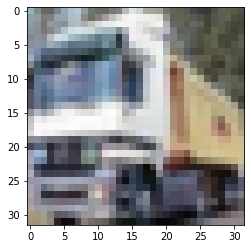

In [55]:
plt.imshow(x_train[1], cmap='gray')

#### 1.2 Use the 5-fold cross-validation to report the average macro-f1 test score (given this is a balanced dataset) and total fit time.

In [56]:
from sklearn.model_selection import cross_validate
import numpy as np

cv_scores = cross_validate(clf, x_train_reshaped, y_train_cat, scoring="f1_macro", cv=5, return_train_score = True)

# Display scores on train and test set at each fold
cv_scores_df = pd.DataFrame(cv_scores) 
print(cv_scores_df)

# Calculate averaged scores for train and test sets (answer is requiring for test set but it might be helpful for analysis)
avg_train_f1 = (np.mean(cv_scores["train_score"]))
avg_test_f1 = (np.mean(cv_scores["test_score"]))
total_time = (np.sum(cv_scores["fit_time"]))

print(f"The cross-validation average F1 (macro-averaged) Score for the train set is: {avg_train_f1}")
print(f"The cross-validation average F1 (macro-averaged) Score for the test set is: {avg_test_f1}")
print(f"The total fit time to train the logistic regression with PCA that explains 90% of the variance is: {total_time}")

   fit_time  score_time  test_score  train_score
0  8.608565    0.063998    0.290400     0.304035
1  8.997700    0.088000    0.272673     0.304977
2  8.841426    0.054997    0.277012     0.302344
3  8.913673    0.051999    0.272582     0.306914
4  8.943550    0.062999    0.273495     0.304120
The cross-validation average F1 (macro-averaged) Score for the train set is: 0.3044780118856238
The cross-validation average F1 (macro-averaged) Score for the test set is: 0.2772323236467553
The total fit time to train the logistic regression with PCA that explains 90% of the variance is: 44.304914236068726


### 2. Using the compressed representations from PCA that explains 90% of variance.

In [57]:
x_train_pca_optimal_90.shape

(50000, 79)

In [58]:
from sklearn.linear_model import LogisticRegression
clf_90 = LogisticRegression(multi_class='multinomial', random_state = 42).fit(x_train_pca_optimal_90, y_train_cat)

#to check the shape of the coefficient matrix
clf_90.coef_.shape

(10, 79)

In [59]:
# Predict
y_train_predicted = clf_90.predict(x_train_pca_optimal_90)

#Let's select one from training set to show the picture
y_train_predicted[1]

'automobile'

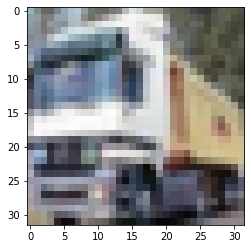

In [60]:
plt.imshow(x_train[1], cmap='gray')

#### 2.1 Use the 5-fold cross-validation to report the average macro-f1 test score (given this is a balanced dataset) and total fit time.

In [61]:
from sklearn.model_selection import cross_validate
import numpy as np
np.random.seed(42)

cv_scores_90 = cross_validate(clf_90, x_train_pca_optimal_90, y_train_cat, scoring="f1_macro", cv=5, return_train_score = True)

# Display scores on train and test set at each fold
cv_scores_df_90 = pd.DataFrame(cv_scores_90) 
print(cv_scores_df_90)

# Calculate averaged scores for both train and test sets
avg_train_f1_90 = (np.mean(cv_scores_90["train_score"]))

# Test scores (not required by question but might be helpful for analysis)
avg_test_f1_90 = (np.mean(cv_scores_90["test_score"]))
total_time_90 = (np.sum(cv_scores_90["fit_time"]))

print(f"The cross-validation average F1 (macro-averaged) Score for the train set is: {avg_train_f1_90}")
print(f"The cross-validation average F1 (macro-averaged) Score for the test set is: {avg_test_f1_90}")
print(f"The total fit time to train the logistic regression with PCA that explains 90% of the variance is: {total_time_90}")

   fit_time  score_time  test_score  train_score
0  0.444000    0.036106    0.300058     0.301719
1  0.453003    0.062000    0.288218     0.306560
2  0.437037    0.034966    0.302193     0.302851
3  0.414001    0.043000    0.292562     0.305252
4  0.438000    0.038001    0.297530     0.304274
The cross-validation average F1 (macro-averaged) Score for the train set is: 0.30413134058720687
The cross-validation average F1 (macro-averaged) Score for the test set is: 0.29611205962448117
The total fit time to train the logistic regression with PCA that explains 90% of the variance is: 2.186040163040161


## *Summary of results - Comparison*

In [62]:
# Summary of results

print('Logistic regression cross-validation results with original dimensions:')
print(f"\tTotal fit time: {round(total_time, 2)}")
print(f"\tAverage F1 (macro-averaged) score for the train set: {round(avg_train_f1, 3)}")
print(f"\tAverage F1 (macro-averaged) score for the test set: {round(avg_test_f1, 3)}")

print('\nLogistic regression cross-validation results with reduced dimensions (90 % of explained variance):')
print(f"\tTotal fit time: {round(total_time_90, 2)}")
print(f"\tAverage F1 (macro-averaged) score for the train set: {round(avg_train_f1_90, 3)}")
print(f"\tAverage F1 (macro-averaged) score for the test set: {round(avg_test_f1_90, 3)}")

Logistic regression cross-validation results with original dimensions:
	Total fit time: 44.3
	Average F1 (macro-averaged) score for the train set: 0.304
	Average F1 (macro-averaged) score for the test set: 0.277

Logistic regression cross-validation results with reduced dimensions (90 % of explained variance):
	Total fit time: 2.19
	Average F1 (macro-averaged) score for the train set: 0.304
	Average F1 (macro-averaged) score for the test set: 0.296


### Extra

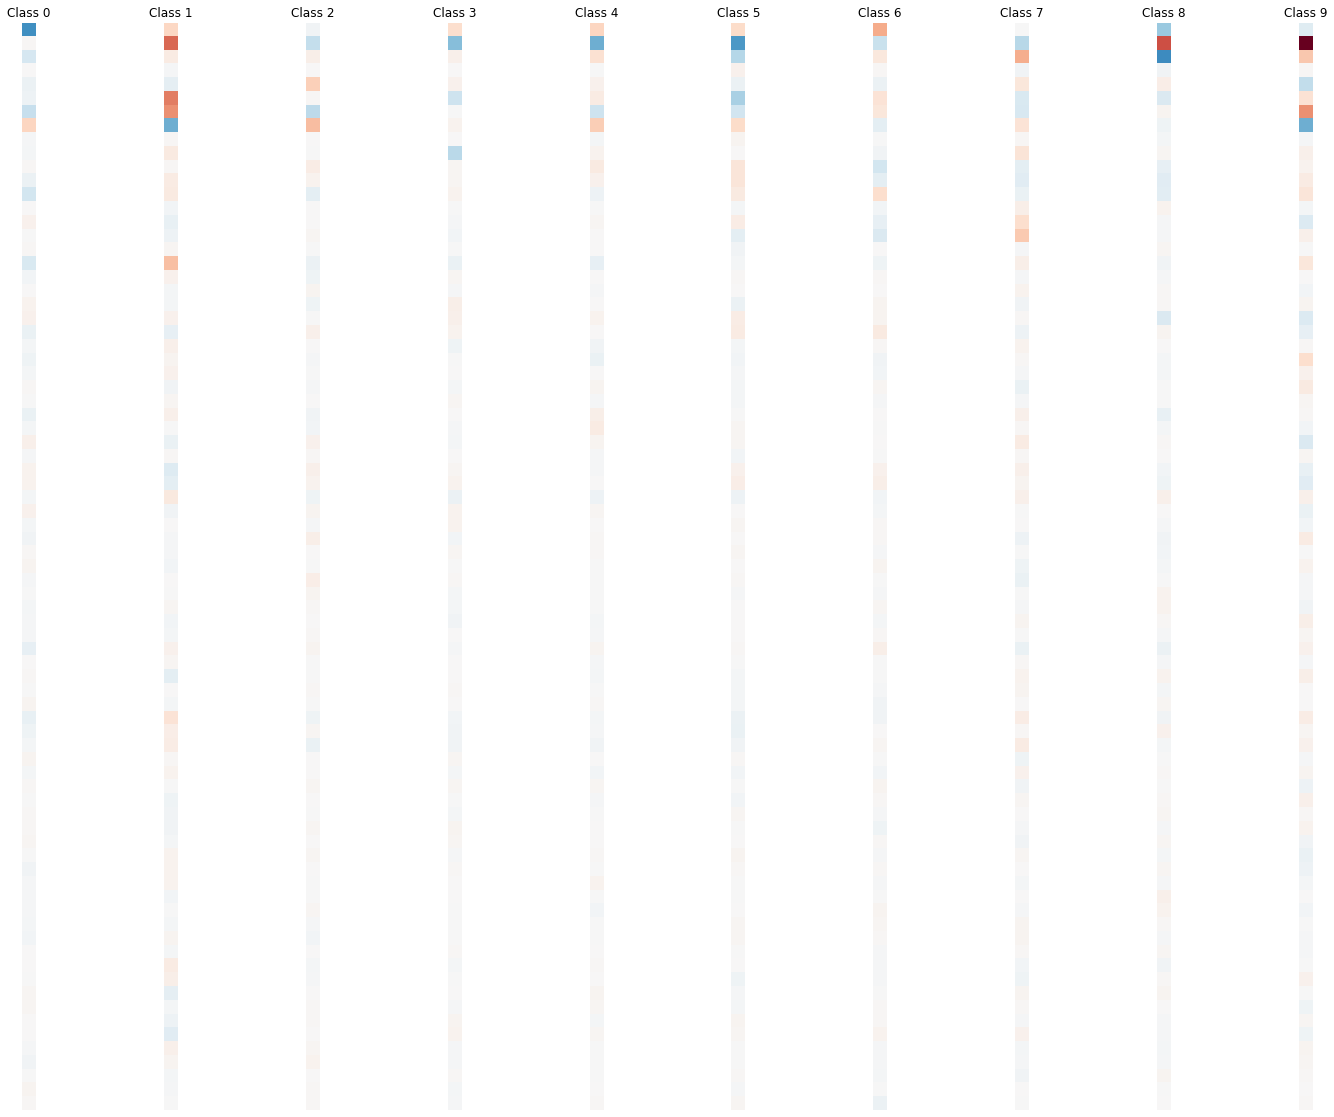

In [63]:
# We could even check the coefficients for each class, similar images might have similar coefficients
# One of the advantages of the logisitc regression is we can interpret the results
scale = np.max(np.abs(clf_90.coef_))

p = plt.figure(figsize=(25, 20));

for i in range(10):
    p = plt.subplot(1, 10, i + 1)
    p = plt.imshow(clf_90.coef_[i].reshape(79, -1),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %i' % i);

#### Of course, given that we are using 79 components, it is hard to see the differences between classes, but from just looking at the first components we can see that classes 3, 4 and 5 are a little similar, corresponding to cat, deer and dog. Moreover, 1 and 9 look a bit similar at a first glance, which correspond to automobile and truck.


Referece: https://medium.com/swlh/logistic-regression-for-image-classification-e15d0ae59ce9

#### Explain your findings

#### *Findings*:

- When we calculate the test set f1 score from cross-validation, in both cases with high and reduced dimensionality we actually get very similar macro averaged f1 scores. 
- Even more surprisingly (or not), we get a slightly better f1 score on the data with PCA.
- This is probably due to the fact that we explained in q 1.2, that is, lower dimensionality is less prone to overfitting and might yield better results because it generalizes better.
- Yet, the key issue to look at here is the total fit time. With original dimensions, we get a total fit time of 105, while on the reduced dimensions is only 6.7. The difference is very significant, and as we stated earlier, this would be helpful for machine learning algortihms to speed up their training process without sacrificing too much on the performance, or even improving it.
- However, in terms of performance, logistic regression for multiclass classification did not perform well, given that the f1 score was 0.30 and this represents a weighted average of both precision and recall.

### Question 1.5 (15 points)

Now let's work with the color images (with 3 channels) and again compress one image, this time by reducing numbers of colors using K-means. You need to cluster pixel values into **32 clusters** and choose the "mean color" to replace all the pixels in each cluster by this mean color. Show the original color image of cat and the mean color image of the same one. Explain your findings. 

Hint: each color pixel is represented by a 3D (R,G,B) vector, and the image would have 32x32 pixels. So you could find the mean color from the centroids of 32 clusters and update the pixels of image with the mean color.

Hint2: Once you have replaced the pixel values with mean color, you need to explicitly convert it into **uint type** such s uint8, uint16, etc, because the image pixel values can only be represented as integers or fractions.

Reference: https://muthu.co/reduce-the-number-of-colors-of-an-image-using-k-means-clustering/

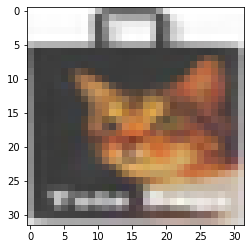

In [64]:
cat_image = x_train[3000]
plt.imshow(cat_image)

In [65]:
# Let's check a pixel that should be white or close (r,g,b) = 255,255,255
x_train[3000][0][0][0]

254

In [66]:
x_train[3000][0][0][1]

254

In [67]:
x_train[3000][0][0][2]

254

In [68]:
x_train[3000]

array([[[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 251, 251],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [250, 250, 250]],

       [[251, 251, 251],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [251, 251, 251],
        [252, 252, 252],
        [251, 251, 251]],

       ...,

       [[149, 149, 149],
        [ 62,  62,  62],
        [ 65,  65,  65],
        ...,
        [207, 200, 190],
        [202, 192, 182],
        [214, 207, 200]],

       [[159, 159, 159],
        [ 71,  71,  71],
        [ 72,  72,  72],
        ...,
        [199, 180, 158],
        [202, 191, 180],
        [212, 207, 203]],

       [[224, 224, 224],
        [194, 194, 194],
        [182, 182, 182],
        ...,
        [214, 201, 185],
        [215, 208, 200],
        [217, 215, 213]]

#### Now let's work with the color images (with 3 channels) and again compress one image, this time by reducing numbers of colors using K-means. You need to cluster pixel values into 32 clusters and choose the "mean color" to replace all the pixels in each cluster by this mean color. 

In [69]:
import numpy as np
from sklearn.cluster import KMeans
from skimage.io import imread, imsave

n_colors = 32

sample_img = cat_image
w,h,_ = sample_img.shape
sample_img = sample_img.reshape(w*h,3)
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(sample_img)

# find out which cluster each pixel belongs to.
labels = kmeans.predict(sample_img)

# the cluster centroids is our "mean color" or color palette for the original pixels
identified_palette = np.array(kmeans.cluster_centers_).astype(int)

# recolor the entire image
recolored_img = np.copy(sample_img)
for index in range(len(recolored_img)):
    recolored_img[index] = identified_palette[labels[index]]
    
# reshape for display
recolored_img = recolored_img.reshape(w,h,3)
imsave('kmeans_color_q.jpg', recolored_img)

In [70]:
recolored_img

array([[[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       ...,

       [[148, 147, 146],
        [ 59,  59,  59],
        [ 66,  64,  66],
        ...,
        [203, 195, 188],
        [203, 195, 188],
        [214, 209, 205]],

       [[159, 157, 157],
        [ 66,  64,  66],
        [ 66,  64,  66],
        ...,
        [202, 181, 156],
        [203, 195, 188],
        [214, 209, 205]],

       [[232, 230, 227],
        [203, 195, 188],
        [181, 180, 180],
        ...,
        [203, 195, 188],
        [214, 209, 205],
        [214, 209, 205]]

In [71]:
sample_img

array([[254, 254, 254],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [214, 201, 185],
       [215, 208, 200],
       [217, 215, 213]], dtype=uint8)

In [72]:
# These are the 32 clusters. the centroids of these clusters have the mean color for the data points that were 
# categorized as that cluster
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

,Cluster_Number,Cluster_Size,R,G,B
0,0,12,186,166,158
1,1,61,66,64,66
2,2,103,252,252,252
3,3,21,170,96,61
4,4,29,131,93,66
5,5,10,214,152,75
6,6,17,121,117,116
7,7,26,214,209,205
8,8,42,100,72,61
9,9,25,232,230,227


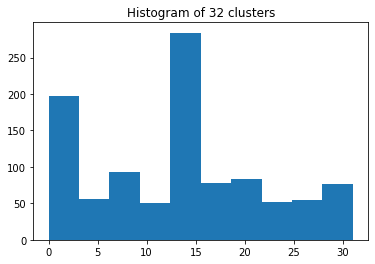

In [73]:
# We can even check how many data points went into each cluster

unique, counts = np.unique(labels, return_counts=True)

cluster_count = pd.DataFrame((np.asarray((unique, counts)).T), columns = ("Cluster_Number", "Cluster_Size"))

# and what is the mean color for that cluster
r_g_b = pd.DataFrame(identified_palette, columns = ("R", "G", "B"))

# plot the histogram
plt.hist(labels)
plt.title("Histogram of 32 clusters")

# and summary of the information
cluster_count_color = pd.merge(cluster_count, r_g_b, left_index = True, right_index = True)
cluster_count_color

Text(0.5, 1.0, 'Recolored image with kmeans')

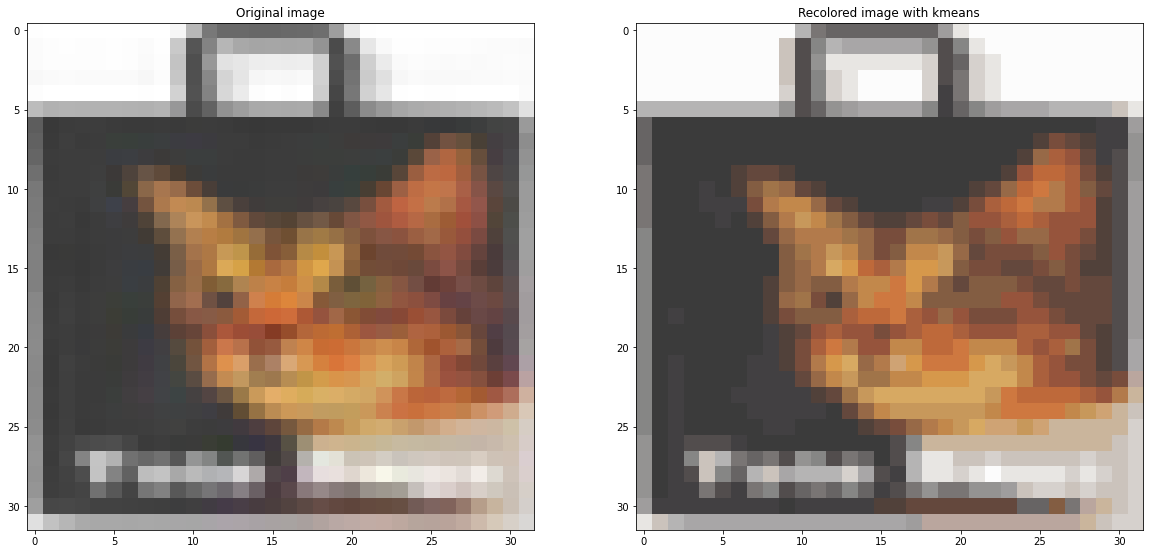

In [74]:
# Plot pictures side by side

plt.figure(figsize=[20,20])

# Display original image in training data
plt.subplot(121)
plt.imshow(cat_image)
plt.title("Original image")

# Display the transformed image
plt.subplot(122)

plt.imshow(recolored_img)
plt.title("Recolored image with kmeans")

#### *Findings*

- K-means clearly performed very well. In terms of results, original and transformed pictures look almost identical.
- In this case, our R,G,B values of each image are represented as 3 Dimensional points on a coordinate system, with values ranging between 0-255 for each color space. 
- K-means works in the following way for this case: We selected K(32) random pixels on the image, then it finds the euclidean distance of each pixel in the image with the cluster centroids. It assigns each data point to the closest centroid that was calculated with the distance found in step before, and then it finds a new centroid by taking the average of the points in each cluster group. It repeats this process until the centroid remains the same after a few iterations. 
- Then, to recreate our picture, we select the cluster centroids which are actually the "mean color" of each group of pixels and we "paint" our image with this palette. Although the pictures look identical at first glimpse, when we detail the colors we realize the colors are not really the same. 
- If we were interested, in the code above, we could see exactly what colors were selected since we have the R,G,B numbers of each centroid, and how many pixels were given to each cluster. It seems that the biggest cluster for this picture was of 220 data points, and was represented by R,G,B 59, 59, 59, which corresponds to a dark grey color. This is probably the backrgound color of the cat.
- We could even reduce the number of colors even further, but we might further sacrifice picture definition.

## Question 2 Birds of a feather sing together


In this question, you will work with movie ratings to build a recommender system just like Netflix, Youtube, etc.


__Load the datasets in three different pandas dataframes `movies`, `tags` and `ratings`.__


References:
- https://blog.codecentric.de/en/2019/07/recommender-system-movie-lens-dataset/

In [75]:
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv('ratings.csv')

In [76]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [77]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [78]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [79]:
ratings[ratings["movieId"] == 1]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


Let's filter the ratings dataframe, to have only movies that have received a rating:

In [80]:
movies['genres'] = movies['genres'].str.replace('|',' ')
movies = movies[movies.movieId.isin(ratings.movieId.unique().tolist())]
movies.shape

(9724, 3)

In [81]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


### Question 2.1 (20 points) Content-based recommender system

We create a new feature called metadata, that merges all the text data information we have about a movie : the genre and the tags. So the merged dataframe should contain at least the following columns: *movieId, title and metadata*.

Then, construct the vectorized reprentation of metadata using sklearn's Countvectorizer to transform the metadata into vectors. Learn the latent matrix from the metadata vector using [truncated SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) with 50 dimensions. With the generated latent matrix, identify the top 10 most relevant movies for **"Toy Story (1995)"** by calculating the cosine similairty and finding movies with the highest similarity score. 



#### We create a new feature called metadata, that merges all the text data information we have about a movie : the genre and the tags. So the merged dataframe should contain at least the following columns: movieId, title and metadata.

In [82]:
# create a mixed dataframe of movies title, genres 
# and all user tags given to each movie
movies_tags_left_raw = pd.merge(movies, tags, on='movieId', how='left')
movies_tags_left_raw.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,336.0,pixar,1.139046e+09
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,474.0,pixar,1.137207e+09
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,567.0,fun,1.525286e+09
3,2,Jumanji (1995),Adventure Children Fantasy,62.0,fantasy,1.528844e+09
4,2,Jumanji (1995),Adventure Children Fantasy,62.0,magic board game,1.528844e+09


In [83]:
# Check NA values
movies_tags_left_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11832 entries, 0 to 11831
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movieId    11832 non-null  int64  
 1   title      11832 non-null  object 
 2   genres     11832 non-null  object 
 3   userId     3662 non-null   float64
 4   tag        3662 non-null   object 
 5   timestamp  3662 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 647.1+ KB


In [84]:
# Create metadata column
movies_tags_left = movies_tags_left_raw.fillna("")
movies_tags = pd.DataFrame(movies_tags_left.groupby('movieId')['tag'].apply(
                             lambda x: "%s" % ' '.join(x)))
movie_tags_metadata = pd.merge(movies, movies_tags, on='movieId', how='left')
movie_tags_metadata['metadata'] = movie_tags_metadata[['genres', 'tag']].apply(
                             lambda x: ' '.join(x), axis = 1)
movie_tags_metadata[['movieId','title','metadata']].head()

,movieId,title,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy pi...
1,2,Jumanji (1995),Adventure Children Fantasy fantasy magic board...
2,3,Grumpier Old Men (1995),Comedy Romance moldy old
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy pregnancy remake


In [85]:
# Convert to lowercase previous to process it
movie_tags_metadata["metadata"] = movie_tags_metadata["metadata"].str.lower()
movie_tags_metadata

,movieId,title,genres,tag,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar pixar fun,adventure animation children comedy fantasy pi...
1,2,Jumanji (1995),Adventure Children Fantasy,fantasy magic board game Robin Williams game,adventure children fantasy fantasy magic board...
2,3,Grumpier Old Men (1995),Comedy Romance,moldy old,comedy romance moldy old
3,4,Waiting to Exhale (1995),Comedy Drama Romance,,comedy drama romance
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake,comedy pregnancy remake
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,,action animation comedy fantasy
9720,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,,animation comedy fantasy
9721,193585,Flint (2017),Drama,,drama
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation,,action animation


In [86]:
# Check movies count remained the same
movie_tags_metadata["movieId"].nunique()

9724

In [87]:
movies["movieId"].nunique()

9724

#### Then, construct the vectorized reprentation of metadata using sklearn's Countvectorizer to transform the metadata into vectors. 

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = movie_tags_metadata["metadata"].tolist()
vectorizer = CountVectorizer(stop_words = "english")
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['06', '1900s', '1920s', ..., 'zombie', 'zombies', 'zooey'],
      dtype=object)

In [89]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
len(vectorizer.get_feature_names_out())

1675

#### Learn the latent matrix from the metadata vector using truncated SVD with 50 dimensions. 

In [91]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np

svd = TruncatedSVD(n_components=50, random_state=42)
latent_matrix = svd.fit_transform(X)

#### With the generated latent matrix, identify the top 10 most relevant movies for "Toy Story (1995)" by calculating the cosine similairty and finding movies with the highest similarity score.

In [92]:
latent_matrix.shape

(9724, 50)

In [93]:
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [94]:
cosine_sim = cosine_similarity(latent_matrix)

In [95]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [96]:
toy_story_metadata_sim = cosine_sim[0] # because toy story is the 1st movie in the matrix

In [97]:
movie_tags_metadata["toy_story_metadata_sim"] = toy_story_metadata_sim

In [98]:
movie_tags_metadata.sort_values(by = "toy_story_metadata_sim", ascending = False)[1:12] #showing all with highest sim score

,movieId,title,genres,tag,metadata,toy_story_metadata_sim
2805,3754,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure Animation Children Comedy Fantasy,,adventure animation children comedy fantasy,0.990349
8909,136016,The Good Dinosaur (2015),Adventure Animation Children Comedy Fantasy,,adventure animation children comedy fantasy,0.990349
7742,91355,Asterix and the Vikings (Astérix et les Viking...,Adventure Animation Children Comedy Fantasy,,adventure animation children comedy fantasy,0.990349
8201,103755,Turbo (2013),Adventure Animation Children Comedy Fantasy,,adventure animation children comedy fantasy,0.990349
6931,65577,"Tale of Despereaux, The (2008)",Adventure Animation Children Comedy Fantasy,,adventure animation children comedy fantasy,0.990349
2996,4016,"Emperor's New Groove, The (2000)",Adventure Animation Children Comedy Fantasy,,adventure animation children comedy fantasy,0.990349
1705,2294,Antz (1998),Adventure Animation Children Comedy Fantasy,,adventure animation children comedy fantasy,0.990349
6469,53121,Shrek the Third (2007),Adventure Animation Children Comedy Fantasy,,adventure animation children comedy fantasy,0.990349
6177,45074,"Wild, The (2006)",Adventure Animation Children Comedy Fantasy,,adventure animation children comedy fantasy,0.990349
9412,166461,Moana (2016),Adventure Animation Children Comedy Fantasy,,adventure animation children comedy fantasy,0.990349


In [99]:
# Get top 10 indices
ind_10 = np.argpartition(cosine_sim[0], -11)[-11:]
ind_10

array([6177, 8201, 2996, 3563, 2805, 1705, 6931, 6469, 7742, 9412,    0],
      dtype=int64)

In [100]:
# Check toy story 2 metadata (it is weird that it's not on the top...)
movie_tags_metadata.loc[movie_tags_metadata['movieId']==3114]

,movieId,title,genres,tag,metadata,toy_story_metadata_sim
2353,3114,Toy Story 2 (1999),Adventure Animation Children Comedy Fantasy,animation Disney funny original Pixar sequel T...,adventure animation children comedy fantasy an...,0.860235


In [101]:
movie_tags_metadata[movie_tags_metadata["title"] == "Toy Story 2 (1999)"].metadata.tolist()

['adventure animation children comedy fantasy animation disney funny original pixar sequel tom hanks pixar']

***Findings so far***
- Until now, we processed all the movies' metadata, first extracting each word through the count vectorizer, and disregarding stop words.
- After, since there were a total of 1675 different words used, we implemented TruncatedSVD to reduce our 9724x1675 sparse matrix to 9724x50 (the sparse matrix retrieved by countvectorizer is a count of each word used by each movie)
- With our reduced matrix, we calculated the cosine similarity between movies, and then extracted only the first row since it is the one about Toy Story.
- Then, we appended the similarity scores to the dataframe originally used as the corpus of the countvectorizer, to get the similarity scores per movie (regarding Toy Story)
- A curious issue that occurred is that the cosine similarity gave a really high scores to all movies that had the exact same genres than Toy Story: "adventure animation children comedy fantasy", but had no tags. Probably a reason to this is that, since toy story has only 3 tags: "pixar pixar fun", any ohter movie with more (and different) tags than this one, even with same genres, would receive a slightly lower score than the highest. 
- Because of this, I checked for Toy Story 2, since it was my intuition that this movie would be in the top 10. Indeeed, it has a high score (0.86), and it has similar tags to Toy Story, but it has more: "animation disney funny original pixar sequel tom hanks pixar".
- Out of curiosity, I will calculate the cosine similarity only for movies that contain tags.

## Test with movies that only have tags

In [102]:
# Check how many movies are in total
movie_tags_metadata.shape

(9724, 6)

In [103]:
# Let's take out the movies that don't have a tag

movie_tags_metadata_2 = movie_tags_metadata.copy()
movie_tags_metadata_2["tag"] = movie_tags_metadata_2["tag"].replace("", np.nan)
movie_tags_metadata_2 = movie_tags_metadata_2[movie_tags_metadata_2['tag'].notna()]
movie_tags_metadata_2.shape

(1554, 6)

In [104]:
# Vectorize our new metadata column 
from sklearn.feature_extraction.text import CountVectorizer
corpus_2 = movie_tags_metadata_2["metadata"] #.tolist()
vectorizer = CountVectorizer(stop_words = "english")
X_2 = vectorizer.fit_transform(corpus_2)
vectorizer.get_feature_names_out()

array(['06', '1900s', '1920s', ..., 'zombie', 'zombies', 'zooey'],
      dtype=object)

In [105]:
# Reduce to 50 components

from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
np.random.seed(42)
svd = TruncatedSVD(n_components=50, random_state=42)
latent_matrix_2 = svd.fit_transform(X_2)

In [106]:
cosine_sim_2 = cosine_similarity(latent_matrix_2)

In [107]:
toy_story_metadata_sim_2 = cosine_sim_2[0] # take out only toy story data

In [108]:
movie_tags_metadata_2["toy_story_metadata_sim_2"] = toy_story_metadata_sim_2
movie_tags_metadata_2.sort_values(by = "toy_story_metadata_sim_2", ascending = False)[:11]

,movieId,title,genres,tag,metadata,toy_story_metadata_sim,toy_story_metadata_sim_2
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar pixar fun,adventure animation children comedy fantasy pi...,1.000000,1.000000
1756,2355,"Bug's Life, A (1998)",Adventure Animation Children Comedy,Pixar,adventure animation children comedy pixar,0.894022,0.907004
3189,4306,Shrek (2001),Adventure Animation Children Comedy Fantasy Ro...,fairy tales,adventure animation children comedy fantasy ro...,0.902939,0.904009
4418,6536,Sinbad: Legend of the Seven Seas (2003),Adventure Animation Children Fantasy,swashbuckler,adventure animation children fantasy swashbuckler,0.887372,0.895378
2353,3114,Toy Story 2 (1999),Adventure Animation Children Comedy Fantasy,animation Disney funny original Pixar sequel T...,adventure animation children comedy fantasy an...,0.860235,0.882369
4354,6377,Finding Nemo (2003),Adventure Animation Children Comedy,Disney fish heartwarming,adventure animation children comedy disney fis...,0.847628,0.868185
1576,2116,"Lord of the Rings, The (1978)",Adventure Animation Children Fantasy,Tolkein classic,adventure animation children fantasy tolkein c...,0.851616,0.856945
8339,108932,The Lego Movie (2014),Action Adventure Animation Children Comedy Fan...,cheeky clever colorful feel-good fun imaginati...,action adventure animation children comedy fan...,0.853129,0.850560
559,673,Space Jam (1996),Adventure Animation Children Comedy Fantasy Sc...,Bugs Bunny,adventure animation children comedy fantasy sc...,0.836360,0.835291
2248,2987,Who Framed Roger Rabbit? (1988),Adventure Animation Children Comedy Crime Fant...,live action/animation,adventure animation children comedy crime fant...,0.802605,0.812546


### *Findings*
- As we can see from the second method, the top scores are a bit lower than in the first method, but each movie has a unique score.
- Moreover, it seems that the movies are more relevant to Toy Story than in the first method : Toy Story 2 is one of the most similar movies, along with Finding Nemo, Shrek, Bug's Life... 
- The downside of this implementation is that we excluded all movies that didn't have a tag, around 7000 movies. From a business perspective, this wouldn't be helpful to implement, since it is completely biased towards movies that have tags and we would end up with no information about movies without tags.
- In conclusion, we were able to recommend items similar to those that Toy Story in terms of content (so, if a user likes toy story, they would probably also like these ones)
- Only from descriptive features of item content we were able to extract similarities.
- Further testing could be done with number of components used in the TruncatedSVD, since there could be a smaller amount of components that could return similar results (not loosing a lot of information).
- For tokenization process, we used unigram tokenization, because in this case most of words did not need to be accompanied by other ones (there are not many full sentences in the corpus that we are using) and word order is not important.
- Stopwords were removed because they provide little semantic content and there are way too many most of the times. While not in the genres, in the tags there could have been some phrases with them.
- The strategy overal of latent semnatic analysis (when we implement TruncatedSVD) is to analyze relationships between the terms of the metadata, assuming that words that are close in meaning will occur in similar pices of text. Then, similarity between movies is done by taking the cosine of the angle between the two vectors, where values close to 1 represent very similar documents. 

### Question 2.2 (15 points) Collaborative filtering recommender system

Similarly, let's creat a latent matrix for ratings and also show the top 10 most relevant movies that receive similar ratings. 


Reference: https://nbviewer.org/github/oekosheri/Recommender-movie/blob/master/Recom_walk_through.ipynb

In [109]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [110]:
ratings.shape

(100836, 4)

In [111]:
# We could check how many movies has each user rated
useridcount = ratings["userId"].value_counts().tolist()
(np.array(useridcount) < 30).sum()

109

There are 610 users, but 109 of them have rated less than 30 movies

In [112]:
movies_ratings_left = pd.merge(movies, ratings, on='movieId', how='left')
movies_ratings_left.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,17,4.5,1305696483


In [113]:
movies_ratings_left.info() #there are no NA

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [114]:
ratings_pivot = movies_ratings_left[["movieId", "rating", "userId", "title"]]

In [115]:
ratings_pivot

,movieId,rating,userId,title
0,1,4.0,1,Toy Story (1995)
1,1,4.0,5,Toy Story (1995)
2,1,4.5,7,Toy Story (1995)
3,1,2.5,15,Toy Story (1995)
4,1,4.5,17,Toy Story (1995)
...,...,...,...,...
100831,193581,4.0,184,Black Butler: Book of the Atlantic (2017)
100832,193583,3.5,184,No Game No Life: Zero (2017)
100833,193585,3.5,184,Flint (2017)
100834,193587,3.5,184,Bungo Stray Dogs: Dead Apple (2018)


In [116]:
#create pivot table
df_pivot = pd.pivot_table(ratings_pivot, index=['movieId',"title"], values = "rating", columns = "userId")
                    
#view pivot table
df_pivot

,userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,Jumanji (1995),NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,Grumpier Old Men (1995),4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,Waiting to Exhale (1995),NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Father of the Bride Part II (1995),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,No Game No Life: Zero (2017),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,Flint (2017),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df_pivot = df_pivot.replace(np.nan, 0)
array_test_1 = df_pivot.to_numpy()
cosine_sim_rating_1 = cosine_similarity(array_test_1)
toy_story_sim_rating_1 = cosine_sim_rating_1[0]
df_pivot["toy_story_sim_rating_1"] = toy_story_sim_rating_1
df_pivot.sort_values( by = "toy_story_sim_rating_1", ascending = False)[1:11]

,userId,1,2,3,4,5,6,7,8,9,10,...,602,603,604,605,606,607,608,609,610,toy_story_sim_rating_1
movieId,title,,,,,,,,,,,,,,,,,,,,,
3114,Toy Story 2 (1999),0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,...,0.0,0.0,0.0,3.5,0.0,3.0,2.5,0.0,5.0,0.572601
480,Jurassic Park (1993),4.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,0.0,...,4.0,0.0,0.0,3.0,2.5,4.0,3.0,3.0,5.0,0.565637
780,Independence Day (a.k.a. ID4) (1996),3.0,0.0,0.0,0.0,0.0,5.0,4.5,0.0,0.0,0.0,...,4.0,0.0,0.0,3.5,2.5,4.0,3.0,0.0,3.5,0.564262
260,Star Wars: Episode IV - A New Hope (1977),5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,5.0,4.0,0.0,5.0,4.5,3.0,3.5,0.0,5.0,0.557388
356,Forrest Gump (1994),4.0,0.0,0.0,0.0,0.0,5.0,5.0,3.0,0.0,3.5,...,3.0,3.0,0.0,3.0,4.0,0.0,3.0,4.0,3.0,0.547096
364,"Lion King, The (1994)",0.0,0.0,0.0,0.0,3.0,5.0,0.0,5.0,0.0,0.0,...,4.0,0.0,4.0,0.0,0.0,0.0,3.5,0.0,0.0,0.541145
1210,Star Wars: Episode VI - Return of the Jedi (1983),5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,3.0,0.0,5.0,4.5,3.0,4.0,0.0,5.0,0.541089
648,Mission: Impossible (1996),3.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,...,4.0,2.0,0.0,0.0,2.5,0.0,3.5,0.0,0.0,0.538913
1265,Groundhog Day (1993),4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,3.0,3.5,0.0,4.5,0.534169


####  Comment: Without implementing SVD, the scores are pretty low. However, in terms of ratings, the movies seem to be also good movies. Let's try to implement SVD and see how the results change. Ideally, we would have a desired explained variation to select number of components for our SVD. I selected "50" because this is the number that we used in Q2.1 

In [118]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
np.random.seed(42)
X_new = csr_matrix(array_test_1)
svd = TruncatedSVD(n_components=50, random_state=42)
latent_matrix_rating = svd.fit_transform(X_new)

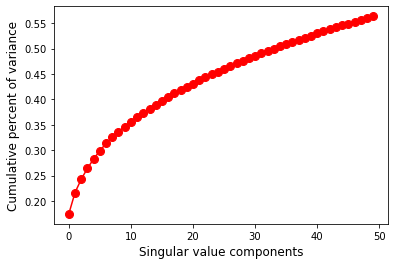

In [119]:
# plot var expalined to see how much explanation we are getting with 50 components
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [120]:
cosine_sim_rating_2 = cosine_similarity(latent_matrix_rating)
toy_story_sim_rating_2 = cosine_sim_rating_2[0]
df_pivot["toy_story_sim_rating_2"] = toy_story_sim_rating_2
df_pivot.sort_values( by = "toy_story_sim_rating_2", ascending = False)[1:11]

,userId,1,2,3,4,5,6,7,8,9,10,...,603,604,605,606,607,608,609,610,toy_story_sim_rating_1,toy_story_sim_rating_2
movieId,title,,,,,,,,,,,,,,,,,,,,,
480,Jurassic Park (1993),4.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,0.0,...,0.0,0.0,3.0,2.5,4.0,3.0,3.0,5.0,0.565637,0.802326
780,Independence Day (a.k.a. ID4) (1996),3.0,0.0,0.0,0.0,0.0,5.0,4.5,0.0,0.0,0.0,...,0.0,0.0,3.5,2.5,4.0,3.0,0.0,3.5,0.564262,0.801406
3114,Toy Story 2 (1999),0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,...,0.0,0.0,3.5,0.0,3.0,2.5,0.0,5.0,0.572601,0.798933
1073,Willy Wonka & the Chocolate Factory (1971),5.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,...,3.0,0.0,4.0,0.0,0.0,3.5,0.0,0.0,0.512246,0.785258
648,Mission: Impossible (1996),3.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.5,0.0,3.5,0.0,0.0,0.538913,0.783881
1265,Groundhog Day (1993),4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,3.0,3.5,0.0,4.5,0.534169,0.772922
1270,Back to the Future (1985),5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,...,2.0,0.0,4.0,3.5,3.0,2.0,0.0,5.0,0.530381,0.771782
356,Forrest Gump (1994),4.0,0.0,0.0,0.0,0.0,5.0,5.0,3.0,0.0,3.5,...,3.0,0.0,3.0,4.0,0.0,3.0,4.0,3.0,0.547096,0.768401
364,"Lion King, The (1994)",0.0,0.0,0.0,0.0,3.0,5.0,0.0,5.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,3.5,0.0,0.0,0.541145,0.761760


#### Comment: Of course, the scores are higher because our matrix was reduced, so some information was lost which automatically makes it "easier" to have a higher score.
- Moreover, we see that the movies are pretty much the same than before. Thus, we reduced from a matrix of 9724x610 columns to one with 9724x50, reducing computational time, while still achieving very similar results
- Since many users didn't rate that many movies, we could instead try to predict users rating by using SVD (matrix factorization), as explained here:
https://surprise.readthedocs.io/en/stable/matrix_factorization.html
- This approach would reduce the RMSE and infer ratings that user would give, since it is a problem for recommender systems when we don't have that user,item pair combination (if a user hasn't rated a movie, and we fill NA with 0, then this might affect the SVD and cosine similarity score later on, since it would perform well on popular - more rated - movies, but not that well with the unpopular ones)
- This would be a model-based CF system, where we first predict user ratings and then we could calculate overall rating similarity

### Question 2.3 (5 points) Hybrid recommender system

Similarly, let's build a hybrid recommender system and also show the top 10 most relevant movies that calculate the average measure of both content and collaborative.


### Since we have 2 different content based recommendations, we will display the 2 different hybrid systems

In [121]:
movie_tags_metadata

,movieId,title,genres,tag,metadata,toy_story_metadata_sim
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar pixar fun,adventure animation children comedy fantasy pi...,1.000000
1,2,Jumanji (1995),Adventure Children Fantasy,fantasy magic board game Robin Williams game,adventure children fantasy fantasy magic board...,0.713238
2,3,Grumpier Old Men (1995),Comedy Romance,moldy old,comedy romance moldy old,0.310037
3,4,Waiting to Exhale (1995),Comedy Drama Romance,,comedy drama romance,0.253172
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake,comedy pregnancy remake,0.434172
...,...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,,action animation comedy fantasy,0.664465
9720,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,,animation comedy fantasy,0.768060
9721,193585,Flint (2017),Drama,,drama,-0.000319
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation,,action animation,0.317094


#### 1. Hybrid_1 : Content-based recommedantions including movies without tags + ratings

In [122]:
# Select data from first content based recommender system
merge1 = movie_tags_metadata[["movieId", "title", "toy_story_metadata_sim"]]

# Select data from rating recommender system
df_pivot.reset_index(inplace= True)
merge2 = df_pivot[["movieId", "toy_story_sim_rating_1"]]

# Merge on movie Id to get both similatities
hybrid_merge = pd.merge(merge1, merge2, on="movieId" )

# Calculate average between 2 scores

hybrid_merge["hybrid_sim"] = (hybrid_merge["toy_story_metadata_sim"] + hybrid_merge["toy_story_sim_rating_1"]) / 2

# Sort and get top 10 similar for toy story

hybrid_merge.sort_values(by = "hybrid_sim", ascending = False)[:11]

,movieId,title,toy_story_metadata_sim,toy_story_sim_rating_1,hybrid_sim
0,1,Toy Story (1995),1.000000,1.000000,1.000000
3563,4886,"Monsters, Inc. (2001)",0.990349,0.504650,0.747499
2353,3114,Toy Story 2 (1999),0.860235,0.572601,0.716418
3189,4306,Shrek (2001),0.902939,0.527977,0.715458
1756,2355,"Bug's Life, A (1998)",0.894022,0.479241,0.686631
1705,2294,Antz (1998),0.990349,0.360652,0.675501
4354,6377,Finding Nemo (2003),0.847628,0.484297,0.665963
7338,78499,Toy Story 3 (2010),0.903326,0.417090,0.660208
506,588,Aladdin (1992),0.769864,0.527859,0.648862
3740,5218,Ice Age (2002),0.886796,0.382734,0.634765


#### 2. Hybrid_2 : Content-based recommedantions based on only movies with tags + ratings

In [123]:
# Select data from second content based recommender system
merge1_hybrid_2 = movie_tags_metadata_2[["movieId",  "title", "toy_story_metadata_sim_2"]]

# Select data from rating recommender system
merge2_hybrid_2 = df_pivot[["movieId", "toy_story_sim_rating_1"]]
#df_pivot.reset_index(inplace= True)

# Merge on movie Id to get both similatities
hybrid_merge_2 = pd.merge(merge1_hybrid_2, merge2_hybrid_2, on="movieId" )

# Calculate average between 2 scores

hybrid_merge_2["hybrid_sim_2"] = (hybrid_merge_2["toy_story_metadata_sim_2"] + hybrid_merge_2["toy_story_sim_rating_1"]) / 2

# Sort and get top 10 similar for toy story

hybrid_merge_2.sort_values(by = "hybrid_sim_2", ascending = False)[:11]

,movieId,title,toy_story_metadata_sim_2,toy_story_sim_rating_1,hybrid_sim_2
0,1,Toy Story (1995),1.000000,1.000000,1.000000
664,3114,Toy Story 2 (1999),0.882369,0.572601,0.727485
807,4306,Shrek (2001),0.904009,0.527977,0.715993
543,2355,"Bug's Life, A (1998)",0.907004,0.479241,0.693122
1010,6377,Finding Nemo (2003),0.868185,0.484297,0.676241
142,588,Aladdin (1992),0.770268,0.527859,0.649064
1243,8961,"Incredibles, The (2004)",0.761223,0.466880,0.614052
641,2987,Who Framed Roger Rabbit? (1988),0.812546,0.408587,0.610567
160,673,Space Jam (1996),0.835291,0.382569,0.608930
1198,8360,Shrek 2 (2004),0.726121,0.433185,0.579653


#### Overall, we tested only with the non-truncated ratings, but we could produce 2 more systems with the truncated ratings and the 2 content ratings that we calculated
- It depends with how much data we are dealing with, and how computationally expensive it is to process the system.
- Either way, as we saw before, at least the top 10 movies between using truncated ratings or not, were not that different.
- This might be because those are popular movies, but if we were to inspect the least popular ones, we might find that the recommendations do not perform well
- Of course, at this stage, it would take a business expert to determine which of the systems performs best, since we don't have the business knowledge on movies and ratings.
- However, a good strategy would be to predict ratings as discussed previously, for those users that don't have one, using SVD and minimizing the RMSE through gradient descent, and attempting to achieve something close to 80 % accuracy. This could definitely improve our recommendation system